### 1. 전처리 (base code :  https://cyc1am3n.github.io/2018/11/10/classifying_korean_movie_review.html)

In [1]:
import json
import os
import nltk
import pickle
import numpy as np
from pprint import pprint

if os.path.isfile('nsmc/train_docs_han.json'):
    with open('nsmc/train_docs_han.json') as f:
        train_docs = json.load(f)
    with open('nsmc/test_docs_han.json') as f:
        test_docs = json.load(f)
        

else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data] #row[1]은 문장, row[2]는 클래스
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

    with open('nsmc/train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('nsmc/test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

pprint(train_docs[0])

[['아/I', '더빙/N', '../S', '진짜/N', '짜증나/P', '네/E', '요/J', '목소리/N'], '0']


In [2]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

text = nltk.Text(tokens, name='NMSC')
print(text)

train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

2400992
<Text: NMSC>


In [3]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2400992
175077
[('이/J', 126395),
 ('./S', 74307),
 ('ㄴ/E', 48586),
 ('하/X', 41141),
 ('영화/N', 37452),
 ('어/E', 34695),
 ('보/P', 33373),
 ('고/E', 32374),
 ('다/E', 30892),
 ('의/J', 30885)]


In [4]:
# selected_words_10000 = [f[0] for f in text.vocab().most_common(10000)]

# #train data
# train_x_common_10000 = []
# for i in range(len(train_docs)):
#     _ = []
#     for word in train_docs[i][0] :
#         try : 
#             _.append(selected_words_10000.index(word))
#         except :
#             _.append(10000)
#     train_x_common_10000.append(_)
    
# #test data
# test_x_common_10000 = []
# for i in range(len(test_docs)):
#     _ = []
#     for word in test_docs[i][0] :
#         try : 
#             _.append(selected_words_10000.index(word))
#         except :
#             _.append(10000)
#     test_x_common_10000.append(_)



# # Save 
# x_train = np.asarray(train_x).astype('float32')
# x_test = np.asarray(test_x).astype('float32')

# y_train = np.asarray(train_y).astype('float32')
# y_test = np.asarray(test_y).astype('float32')
    
# with open("selected_words_10000.txt", "wb") as fp:
#     pickle.dump(selected_words_10000, fp)    

In [5]:
#load 
with open("x_train_common_10000.txt", "rb") as fp:
    X_train = pickle.load(fp)
with open("x_test_common_10000.txt", "rb") as fp:
    X_test = pickle.load(fp)
with open("selected_words_10000.txt", "rb") as fp:
    selected_words_10000 = pickle.load(fp) 

### 2. LSTM 훈련

In [6]:
from __future__ import print_function
import numpy as np
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

from keras import optimizers
from keras import losses
from keras import metrics

from keras import backend as K
from keras.models import Model

import matplotlib.pyplot as plt
from IPython.display import display, HTML


Using TensorFlow backend.


In [7]:
max_features = 1000
maxlen = 100
batch_size = 1024

In [8]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(train_y, num_classes)
y_test = keras.utils.to_categorical(test_y, num_classes)

In [9]:
print('훈련 데이터: {}'.format(len(X_train)))
print('테스트 데이터: {}'.format(len(X_test)))
print('카테고리: {}'.format(num_classes))

훈련 데이터: 150000
테스트 데이터: 50000
카테고리: 2


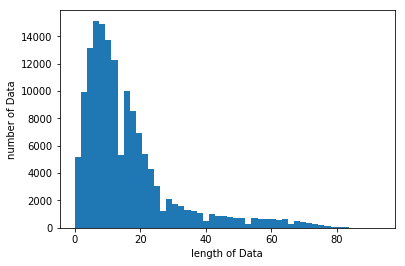

In [10]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [11]:
maxlen = 30
x_train = sequence.pad_sequences(X_train, maxlen)
x_test = sequence.pad_sequences(X_test, maxlen)

In [12]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 640,  11,  47,
       505,  41,  28, 743], dtype=int32)

In [13]:
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10)

Train...
Epoch 1/10
150000/150000 [==============================] - 18s 117us/step - loss: 0.4949 - acc: 0.7592
Epoch 2/10
150000/150000 [==============================] - 12s 80us/step - loss: 0.3723 - acc: 0.8323
Epoch 3/10
150000/150000 [==============================] - 12s 80us/step - loss: 0.3485 - acc: 0.8425
Epoch 4/10
150000/150000 [==============================] - 12s 79us/step - loss: 0.3316 - acc: 0.8496
Epoch 5/10
150000/150000 [==============================] - 12s 82us/step - loss: 0.3165 - acc: 0.8556
Epoch 6/10
150000/150000 [==============================] - 12s 82us/step - loss: 0.3025 - acc: 0.8621
Epoch 7/10
150000/150000 [==============================] - 12s 81us/step - loss: 0.2886 - acc: 0.8686
Epoch 8/10
150000/150000 [==============================] - 12s 82us/step - loss: 0.2751 - acc: 0.8744
Epoch 9/10
150000/150000 [==============================] - 12s 79us/step - loss: 0.2618 - acc: 0.8804
Epoch 10/10
150000/150000 [==============================] - 12

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,329,538
Trainable params: 1,329,538
Non-trainable params: 0
_________________________________________________________________


In [15]:
results = model.evaluate(x_test, y_test)

50000/50000 [==============================] - 35s 697us/step


In [16]:
results

[0.45329076104164123, 0.81901]

### 3. LRP & Visualization (base code : https://github.com/ArrasL/LRP_for_LSTM)

In [17]:
def html_heatmap (words, scores, cmap_name="bwr"):
    """
    Return word-level heatmap in HTML format,
    with words being the list of words (as string),
    scores the corresponding list of word-level relevance values,
    and cmap_name the name of the matplotlib diverging colormap.
    """
    
    colormap  = plt.get_cmap(cmap_name)
     
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        score       = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, score, colormap) + " "
    
    return output_text + "\n"

def rescale_score_by_abs (score, max_score, min_score):
    """
    Normalize the relevance value (=score), accordingly to the extremal relevance values (max_score and min_score), 
    for visualization with a diverging colormap.
    i.e. rescale positive relevance to the range [0.5, 1.0], and negative relevance to the range [0.0, 0.5],
    using the highest absolute relevance for linear interpolation.
    """
    
    # CASE 1: positive AND negative scores occur --------------------
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
    
    # CASE 2: ONLY positive scores occur -----------------------------       
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)
    
    # CASE 3: ONLY negative scores occur -----------------------------
    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)
          

def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))

     
def span_word (word, score, colormap):
    return "<span style=\"background-color:"+getRGB(colormap(score))+"\">"+word+"</span>"

In [20]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    if name == 'lstm_1/kernel:0':
        kernel_0 = weight
    if name == 'lstm_1/recurrent_kernel:0':
        recurrent_kernel_0 = weight
    if name == 'lstm_1/bias:0':
        bias_0 = weight
    elif name == 'dense_1/kernel:0':
        output = weight

In [21]:
print("kernel_0", kernel_0.shape)
print("recurrent_kernel_0", recurrent_kernel_0.shape)
print("bias_0", bias_0.shape)
print("output", output.shape)

kernel_0 (128, 256)
recurrent_kernel_0 (64, 256)
bias_0 (256,)
output (64, 2)


In [22]:
def get_layer_output(layer_name, data):
    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    intermediate_layer_model = keras.Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return intermediate_layer_model.predict(data)  

In [23]:
outputs = {}
for layer in model.layers :
    outputs[layer.name] = get_layer_output(layer.name, x_train[0])
    print(layer.name, outputs[layer.name].shape)

embedding_1 (30, 1, 128)
lstm_1 (30, 64)
dropout_1 (30, 64)
dense_1 (30, 2)


In [27]:
def get_relavance(target_data, target_class) :
    e = get_layer_output('embedding_1', target_data).squeeze()
    
    #forword
    T = maxlen
    d = int(256/4)  # hidden units

    idx    = np.hstack((np.arange(0,d), np.arange(2*d,4*d))).astype(int) # indices of gates i,f,o together
    idx_i, idx_g, idx_f, idx_o = np.arange(0,d), np.arange(d,2*d), np.arange(2*d,3*d), np.arange(3*d,4*d) # indices of gates i,g,f,o separately

    h  = np.zeros((T,d))
    c  = np.zeros((T,d))

    gates_xh  = np.zeros((T, 4*d))  
    gates_hh  = np.zeros((T, 4*d)) 
    gates_pre = np.zeros((T, 4*d))  
    gates     = np.zeros((T, 4*d))  

    for t in range(T):
        gates_xh[t]     = np.dot(e[t], kernel_0)
        gates_hh[t]     = np.dot(h[t-1],recurrent_kernel_0)
        gates_pre[t]    = gates_xh[t] + gates_hh[t] + bias_0
        gates[t, idx]    = 1.0/(1.0 + np.exp(- gates_pre[t,idx]))
        gates[t,idx_g]  = np.tanh(gates_pre[t,idx_g]) 
        c[t]            = gates[t,idx_f]*c[t-1] + gates[t,idx_i]*gates[t,idx_g]
        h[t]            = gates[t,idx_o]*np.tanh(c[t])

    score = np.dot(h[t], output)    
    
    #backword

    C      = output.shape[1] # number of classes
    dx     = np.zeros(e.shape)

    dh          = np.zeros((T, d))
    dc          = np.zeros((T, d))
    dgates_pre  = np.zeros((T, 4*d))  # gates pre-activation
    dgates      = np.zeros((T, 4*d))  # gates activation

    ds                    = np.zeros((C))
    ds[target_class] = 1.0
    dy               = ds.copy()

    #맨처음을 0으로 시작하지 않게 위한조치
    dh[T-1]     = np.dot(dy, output.T)

    for t in reversed(range(T)): 
        dgates[t,idx_o]    = dh[t] * np.tanh(c[t])  # do[t]
        dc[t]             += dh[t] * gates[t,idx_o] * (1.-(np.tanh(c[t]))**2) # dc[t]
        dgates[t,idx_f]    = dc[t] * c[t-1]         # df[t]
        dc[t-1]            = dc[t] * gates[t,idx_f] # dc[t-1]
        dgates[t,idx_i]    = dc[t] * gates[t,idx_g] # di[t]
        dgates[t,idx_g]    = dc[t] * gates[t,idx_i] # dg[t]
        dgates_pre[t,idx]  = dgates[t,idx] * gates[t,idx] * (1.0 - gates[t,idx]) # d ifo pre[t]
        dgates_pre[t,idx_g]= dgates[t,idx_g] *  (1.-(gates[t,idx_g])**2) # d g pre[t]
        dh[t-1]            = np.dot(dgates_pre[t], recurrent_kernel_0.T)
        dx[t]           = np.dot(dgates_pre[t], kernel_0.T)
    
    return score, dx

In [28]:
target_data = x_train[0]
target_class = np.argmax(y_train[0])

In [29]:
scores, Gx =get_relavance(target_data, target_class)

In [30]:
R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
R_words_GI       = np.dot(target_data, Gx)        

In [31]:
def index_to_word(list):
    _ = []
    for x in list :
        if x != 0 and x != 10000 :
            _.append(selected_words_10000[x].split('/')[0])
    return _

In [32]:
words = index_to_word(target_data)

In [33]:
print(' '.join(words))

아 더빙 .. 진짜 짜증나 네 요 목소리


In [34]:
print ("prediction scores:       ",   scores)
print ("\nSA/GI target class:      ", target_class)
print ("\nSA relevances:")

for idx, w in enumerate(words):
    print ("\t\t\t" + "{:8.5f}".format(R_words_SA[idx]) + "\t" + w)
    
print ("\nSA heatmap:")    
display(HTML(html_heatmap(words, R_words_SA)))

print ("\nGI relevances:")
for idx, w in enumerate(words):
    print ("\t\t\t" + "{:8.2f}".format(R_words_GI[idx]) + "\t" + w)
print ("\nGI heatmap:")    
display(HTML(html_heatmap(words, R_words_GI[:100])))

prediction scores:        [-1.0516348   0.96662339]

SA/GI target class:       0

SA relevances:
			 0.01665	아
			 0.04708	더빙
			 0.00709	..
			 0.00660	진짜
			 0.06546	짜증나
			 0.00425	네
			 0.09090	요
			 0.10230	목소리

SA heatmap:



GI relevances:
			  -98.08	아
			 -187.02	더빙
			   67.81	..
			   63.61	진짜
			 -205.26	짜증나
			   45.62	네
			 -240.87	요
			  257.71	목소리

GI heatmap:


In [36]:
def int_to_str(target_class):
    if target_class == 0 :
        return "부정"
    else :
        return "긍정"

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0]

array([0.00697564, 0.99308854], dtype=float32)

In [39]:
positive_list = []
negative_list = []

for i in range(len(y_test)):
    if np.argmax(y_test[i]) == 1:
        positive_list.append(i)
    else :
        negative_list.append(i)

In [42]:
for index, i in enumerate(negative_list):
    target_data = x_test[i]
    target_class = np.argmax(predictions[i])

    scores, Gx =get_relavance(target_data, target_class)
    R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
    R_words_GI       = np.dot(target_data, Gx) 

    words = index_to_word(target_data)
    
    if len(words) > 0 :
        print("| 실제 레이블 : ", int_to_str(target_class), " | 예측 레이블:", int_to_str(np.argmax(predictions[i])))

    #     print("        SA heatmap:")
    #    display(HTML(html_heatmap(words, R_words_SA)))

    #     print("        GI heatmap:")
        display(HTML(html_heatmap(words, R_words_GI)))

        print("-----------------------------------------------------------")
        
    if index == 50: # 50개만 출력
        break

| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------


In [43]:
for index, i in enumerate(positive_list):
    target_data = x_test[i]
    target_class = np.argmax(predictions[i])

    scores, Gx =get_relavance(target_data, target_class)
    R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
    R_words_GI       = np.dot(target_data, Gx) 

    words = index_to_word(target_data)
    
    if len(words) > 0 :
        print("| 실제 레이블 : ", int_to_str(target_class), " | 예측 레이블:", int_to_str(np.argmax(predictions[i])))
        display(HTML(html_heatmap(words, R_words_GI)))

        print("-----------------------------------------------------------")
        
    if index == 50: # 50개만 출력
        break

| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  부정  | 예측 레이블: 부정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
| 실제 레이블 :  긍정  | 예측 레이블: 긍정


-----------------------------------------------------------
